# 📝 Exercise M1.02

The goal of this exercise is to fit a similar model as in the previous
notebook to get familiar with manipulating scikit-learn objects and in
particular the `.fit/.predict/.score` API.

Let's load the adult census dataset with only numerical variables

In [30]:
import pandas as pd
%load_ext autotime
adult_census = pd.read_csv("../datasets/adult-census-numeric.csv")
data = adult_census.drop(columns="class")
target = adult_census["class"]
print(adult_census.shape)
adult_census.head()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
(39073, 5)


,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


time: 16 ms (started: 2022-09-15 16:38:59 +02:00)


In the previous notebook we used `model = KNeighborsClassifier()`. All
scikit-learn models can be created without arguments. This is convenient
because it means that you don't need to understand the full details of a
model before starting to use it.

One of the `KNeighborsClassifier` parameters is `n_neighbors`. It controls
the number of neighbors we are going to use to make a prediction for a new
data point.

What is the default value of the `n_neighbors` parameter? Hint: Look at the
documentation on the [scikit-learn
website](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
or directly access the description inside your notebook by running the
following cell. This will open a pager pointing to the documentation.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier?

time: 0 ns (started: 2022-09-15 16:38:59 +02:00)


Create a `KNeighborsClassifier` model with `n_neighbors=50`

In [32]:
model = KNeighborsClassifier(n_neighbors=50, n_jobs=4)

time: 0 ns (started: 2022-09-15 16:38:59 +02:00)


Fit this model on the data and target loaded above

In [33]:
model.fit(data, target)
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


time: 78 ms (started: 2022-09-15 16:38:59 +02:00)


Use your model to make predictions on the first 10 data points inside the
data. Do they match the actual target values?

In [34]:
data_samp = data.iloc[:10, :]
pred = model.predict(data_samp)
pred

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

time: 16 ms (started: 2022-09-15 16:38:59 +02:00)


Compute the accuracy on the training data.

In [35]:
model.score(data, target)
#data_samp.values

0.8290379545978042

time: 2 s (started: 2022-09-15 16:38:59 +02:00)


Now load the test data from `"../datasets/adult-census-numeric-test.csv"` and
compute the accuracy on the test data.

In [36]:
test_data = pd.read_csv("../datasets/adult-census-numeric-test.csv")
test_data.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,20,0,0,35,<=50K
1,53,0,0,72,>50K
2,41,0,0,50,>50K
3,20,0,0,40,<=50K
4,25,0,0,40,<=50K


time: 0 ns (started: 2022-09-15 16:39:01 +02:00)


In [29]:
model.score(test_data.drop('class', axis=1), test_data['class'])

0.8188146176681339

time: 593 ms (started: 2022-09-15 16:35:54 +02:00)


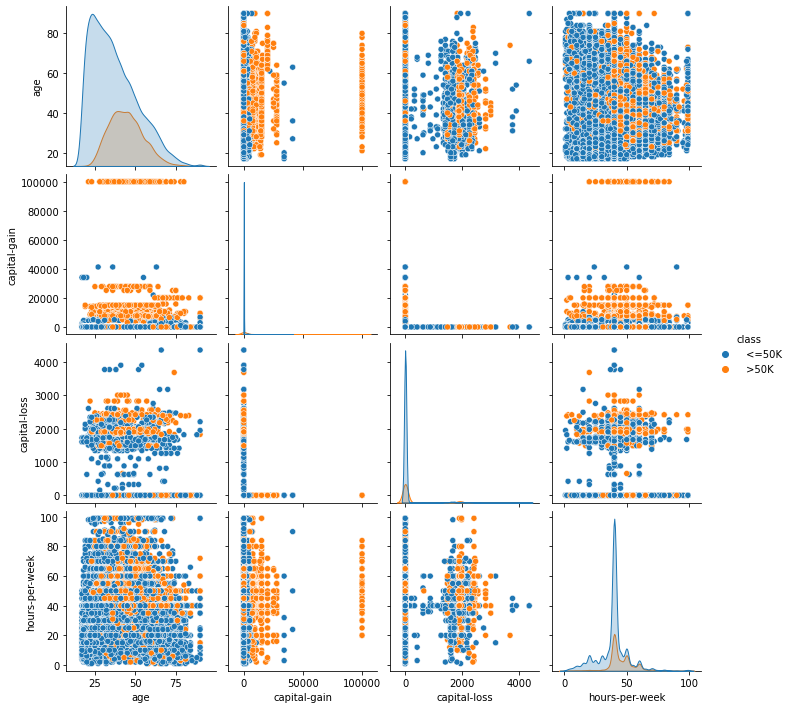

In [36]:
import seaborn as sns
sns.pairplot(adult_census, hue='class')